In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from src.paths import processed_data_path,repo_path

In [2]:
cfm_data_path = f'{repo_path}CFM_Lancaster/data/cfm_input/'
ds_path = f"{processed_data_path}stations_ds.nc"
ds = xr.open_dataset(ds_path)
stations = ds.station.data
variables = list(ds.keys())

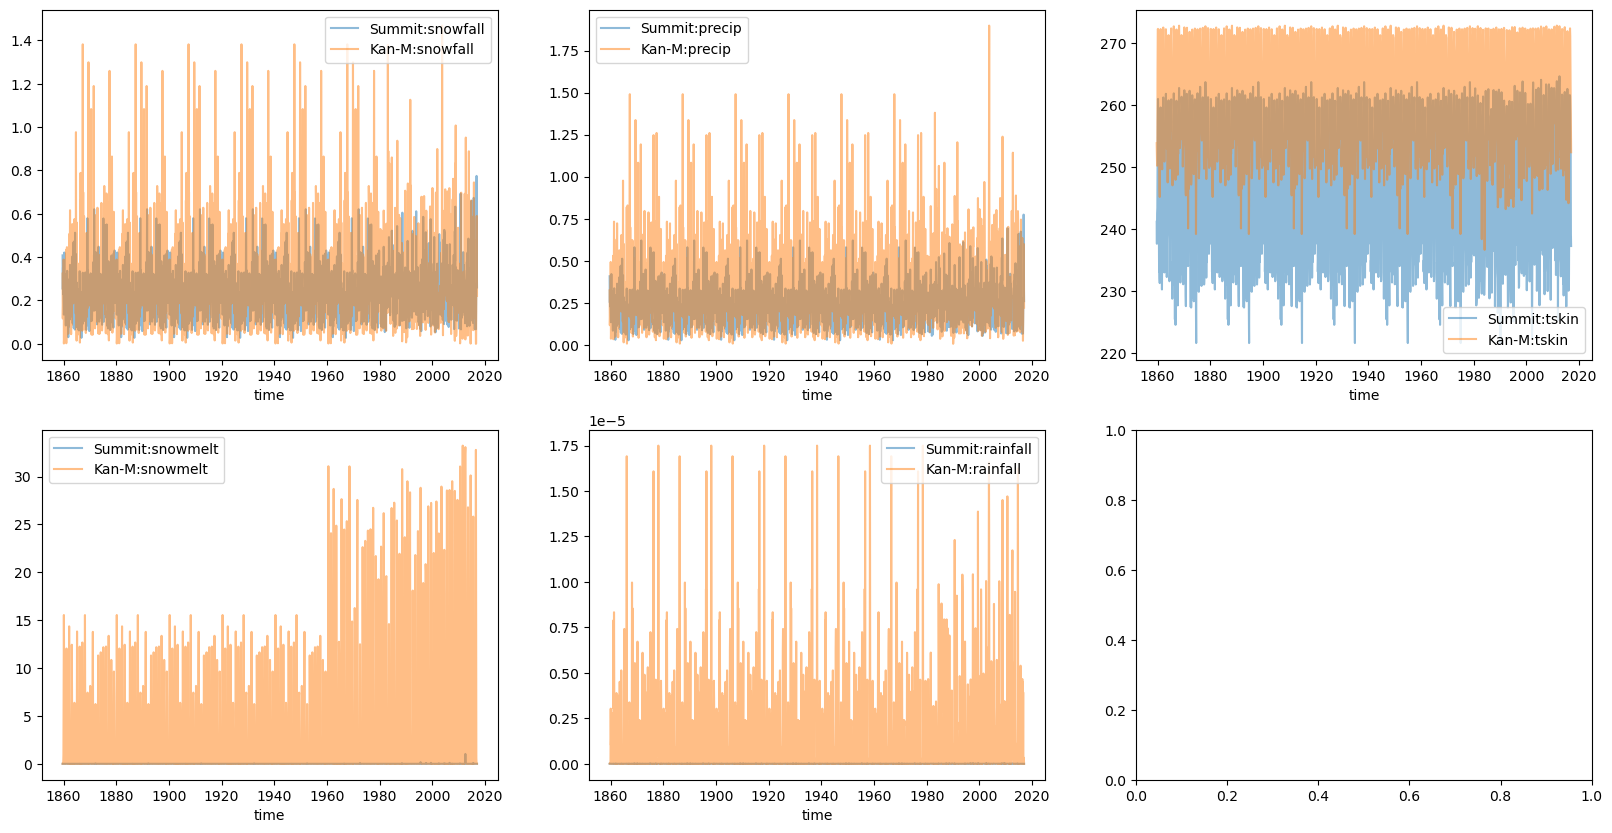

In [15]:
fig, subplots = plt.subplots(2, 3,figsize=(20,10))

stations = ['Summit','Kan-M']

for station in stations:
    for ax,variable in zip(subplots.flat,variables):
        df = pd.read_csv(f'{cfm_data_path}{station}_{variable}.csv').T
        df = df.reset_index()
        df.rename(columns = {"index":"time",0:f"{variable}"}, inplace = True)
        df = df.apply(pd.to_numeric) 
        df.plot(x='time',ax=ax,alpha=0.5)
        ax.legend([f'{stations[0]}:{variable}',f'{stations[1]}:{variable}'])

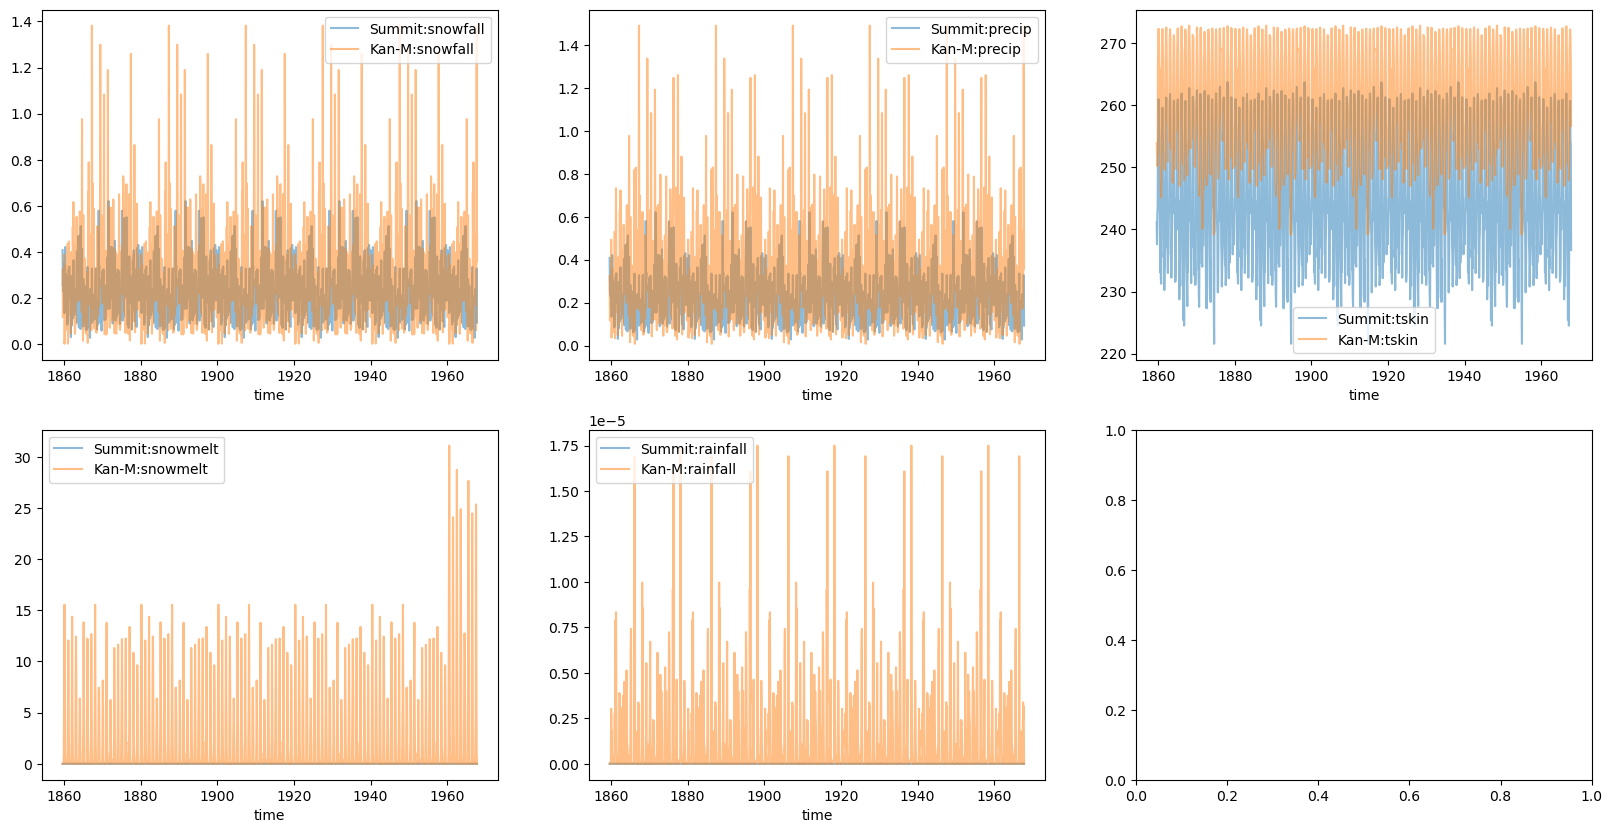

In [16]:
fig, subplots = plt.subplots(2, 3,figsize=(20,10))

stations = ['Summit','Kan-M']

for station in stations:
    for ax,variable in zip(subplots.flat,variables):
        df = pd.read_csv(f'{cfm_data_path}{station}_{variable}.csv').T
        df = df.reset_index()
        df.rename(columns = {"index":"time",0:f"{variable}"}, inplace = True)
        df = df.apply(pd.to_numeric) 
        df_spin = df[df.time < 1967.8]
        df_spin.plot(x='time',ax=ax,alpha=0.5)
        ax.legend([f'{stations[0]}:{variable}',f'{stations[1]}:{variable}'])